In [1]:
#Linear Reg, KNN, RF Model
#Cross Validation & MAE
#Grid Search CV for hyperparameter tuning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

In [3]:
X = pd.read_csv("X Data.csv")
numeric_df = pd.read_csv('Numeric Data.csv')

In [4]:
X.head()

,Unnamed: 0,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,DM_Hawaii,DM_Los Angeles,DM_New York City,DM_Rhode Island,DM_Seattle,DM_Entire home/apt,DM_Hotel room,DM_Private room,DM_Shared room
0,0,1.805040,-0.405302,-0.877451,-0.009224,0.944019,1,0,0,0,0,1,0,0,0
1,1,-0.260837,0.021252,-0.660446,-0.204222,1.135798,1,0,0,0,0,1,0,0,0
2,2,-0.432994,0.362494,-0.674913,-0.399220,1.556235,1,0,0,0,0,1,0,0,0
3,3,-0.519072,0.362494,-0.284304,-0.399220,-0.619712,1,0,0,0,0,1,0,0,0
4,4,-0.174759,0.191873,-0.371106,0.575770,1.563611,1,0,0,0,0,1,0,0,0


In [5]:
X = X.drop(columns='Unnamed: 0')

In [6]:
X.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,DM_Hawaii,DM_Los Angeles,DM_New York City,DM_Rhode Island,DM_Seattle,DM_Entire home/apt,DM_Hotel room,DM_Private room,DM_Shared room
0,1.805040,-0.405302,-0.877451,-0.009224,0.944019,1,0,0,0,0,1,0,0,0
1,-0.260837,0.021252,-0.660446,-0.204222,1.135798,1,0,0,0,0,1,0,0,0
2,-0.432994,0.362494,-0.674913,-0.399220,1.556235,1,0,0,0,0,1,0,0,0
3,-0.519072,0.362494,-0.284304,-0.399220,-0.619712,1,0,0,0,0,1,0,0,0
4,-0.174759,0.191873,-0.371106,0.575770,1.563611,1,0,0,0,0,1,0,0,0


In [7]:
X.shape

(62808, 14)

In [8]:
X['minimum_nights'].max(), X['number_of_reviews'].max(), X['reviews_per_month'].max(), X['calculated_host_listings_count'].max(), X['availability_365'].max()

(6.108951607594908,
 3.689612474415388,
 2.9997064892032563,
 5.938219243507531,
 1.703756521029944)

In [9]:
numeric_df.head()

,Unnamed: 0,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,124,30,10,0.09,5,261
1,1,239,6,20,0.24,3,287
2,2,120,4,28,0.23,1,344
3,3,120,3,28,0.50,1,49
4,4,221,7,24,0.44,11,345


In [10]:
numeric_df = numeric_df.drop(columns='Unnamed: 0')

In [11]:
numeric_df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,124,30,10,0.09,5,261
1,239,6,20,0.24,3,287
2,120,4,28,0.23,1,344
3,120,3,28,0.50,1,49
4,221,7,24,0.44,11,345


In [12]:
y = numeric_df['price']
y

0        124
1        239
2        120
3        120
4        221
        ... 
62803    100
62804     79
62805     79
62806    200
62807     35
Name: price, Length: 62808, dtype: int64

In [13]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=47)

In [14]:
X_train.shape, X_test.shape

((43965, 14), (18843, 14))

In [15]:
y_train.shape, y_test.shape

((43965,), (18843,))

In [16]:
X_train.dtypes

minimum_nights                    float64
number_of_reviews                 float64
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
DM_Hawaii                           int64
DM_Los Angeles                      int64
DM_New York City                    int64
DM_Rhode Island                     int64
DM_Seattle                          int64
DM_Entire home/apt                  int64
DM_Hotel room                       int64
DM_Private room                     int64
DM_Shared room                      int64
dtype: object

# First Model: Linear Regression

In [17]:
clm = LinearRegression()

In [18]:
clm.fit(X_train, y_train)

LinearRegression()

In [19]:
y_train_pred = clm.predict(X_train)
y_test_pred = clm.predict(X_test)

# Model Assessment

In [20]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.22606665920264324, 0.2137204238493403)

In [21]:
mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)

(76.44677051347664, 77.65315452024625)

In [22]:
cv_results = cross_val_score(clm, X_train, y_train, cv = 5)
cv_results

array([0.22888761, 0.21641506, 0.21932744, 0.23252398, 0.22939046])

In [23]:
np.mean(cv_results), np.std(cv_results)

(0.2253089087491394, 0.006267407884765781)

In [24]:
np.round((np.mean(cv_results) - 2 * np.std(cv_results), np.mean(cv_results) + 2 * np.std(cv_results)), 2)

array([0.21, 0.24])

# Hyperparameter tuning with GridSearchCV 

In [25]:
pipe = make_pipeline(SelectKBest(f_regression, k='all'), LinearRegression())

In [26]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('selectkbest',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x000002132A1EF8B0>)),
                ('linearregression', LinearRegression())])

In [27]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [28]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.22606665920264324, 0.2137204238493403)

In [29]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(76.44677051347664, 77.65315452024625)

In [30]:
cv_results2 = cross_val_score(pipe, X_train, y_train, cv=5)
print(cv_results2)

[0.22888761 0.21641506 0.21932744 0.23252398 0.22939046]


In [31]:
np.mean(cv_results2), np.std(cv_results2)

(0.2253089087491394, 0.006267407884765781)

In [32]:
np.round((np.mean(cv_results2) - 2 * np.std(cv_results2), np.mean(cv_results2) + 2 * np.std(cv_results2)), 2)

array([0.21, 0.24])

In [33]:
k  =[k+1 for k in range(len(X_train.columns))]
params = {'selectkbest__k': k}

In [34]:
lr_grid_cv = GridSearchCV(pipe, param_grid = params, cv=5, n_jobs=-1)

In [35]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest',
                                        SelectKBest(k='all',
                                                    score_func=<function f_regression at 0x000002132A1EF8B0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14]})

In [36]:
lr_grid_cv.best_params_

{'selectkbest__k': 11}

In [37]:
pipe_best = make_pipeline(SelectKBest(f_regression, k=11), LinearRegression())

In [38]:
pipe_best.fit(X_train, y_train)
y_pr_lr = pipe_best.predict(X_test)

In [39]:
r2_score(y_test, y_pr_lr)

0.21374880939563135

In [40]:
mean_absolute_error(y_test, y_pr_lr)

77.61039022490115

In [41]:
cv_best = cross_val_score(pipe_best, X_train, y_train, cv=5)
print(cv_best)

[0.22870177 0.21665446 0.21910257 0.23219328 0.23030034]


In [42]:
np.mean(cv_best), np.std(cv_best)

(0.2253904850989712, 0.0062802128779136344)

In [43]:
np.round((np.mean(cv_best) - 2 * np.std(cv_best), np.mean(cv_best) + 2 * np.std(cv_best)), 2)

array([0.21, 0.24])

# Most Useful Features

In [44]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [45]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

DM_Hotel room                     8.743701e+12
DM_Entire home/apt                8.743701e+12
DM_Private room                   8.743701e+12
DM_Shared room                    8.743701e+12
DM_Rhode Island                   7.990554e+01
DM_Hawaii                         1.893011e+01
availability_365                  1.542433e+01
calculated_host_listings_count   -5.449229e-01
minimum_nights                   -1.540934e+01
reviews_per_month                -1.800401e+01
DM_New York City                 -2.469727e+01
dtype: float64

# Second Model: Random Forest Model

In [46]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Model Assessment

In [47]:
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print(rf_cv_scores)

[0.25232439 0.24542321 0.26908937 0.25570136 0.25185234]


In [48]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.25487813406745163, 0.007844864583508252)

In [49]:
r2_score(y_test, y_pred_rf)

0.24976315174136543

In [50]:
mean_absolute_error(y_test, y_pred_rf)

75.78272987467379

# Hyperparameter Tuning Using GridSearchCV 

In [51]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [52]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {'n_estimators' : n_est}
grid_params

{'n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000]}

In [53]:
rf_grid_cv = GridSearchCV(rf, param_grid = grid_params, cv=5, n_jobs=-1)
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [10, 12, 16, 20, 26, 33, 42, 54, 69,
                                          88, 112, 143, 183, 233, 297, 379, 483,
                                          615, 784, 1000]})

In [54]:
print(rf_grid_cv.best_estimator_)
print(rf_grid_cv.best_params_)

RandomForestRegressor(n_estimators=784)
{'n_estimators': 784}


In [55]:
rf_best = RandomForestRegressor(n_estimators=784)
rf_best.fit(X_train, y_train)
y_pr_best_rf = rf_best.predict(X_test)

In [56]:
cv_rf_best = cross_val_score(rf_best, X_train, y_train, cv=5)
print(cv_rf_best)

[0.26023151 0.24966745 0.27697864 0.26463312 0.25956181]


In [57]:
np.mean(cv_rf_best), np.std(cv_rf_best)

(0.2622145059763835, 0.00885694059219166)

In [58]:
mean_absolute_error(y_test, y_pr_best_rf)

75.46548364324578

# Model 3: KNN Regression

In [59]:
rmse_val = []
for K in range(20):
    K= K+1
    model = KNeighborsRegressor(n_neighbors=K)
    
    model.fit(X_train, y_train)
    y_pred_knn = model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, y_pred_knn))
    rmse_val.append(error)
    print('RMSE value for k= ', K, 'is:', error)

RMSE value for k=  1 is: 162.0538339533371
RMSE value for k=  2 is: 141.2573034905375
RMSE value for k=  3 is: 133.19471619511233
RMSE value for k=  4 is: 129.330101004645
RMSE value for k=  5 is: 127.44250413880215
RMSE value for k=  6 is: 125.62474429108765
RMSE value for k=  7 is: 124.79720785098571
RMSE value for k=  8 is: 124.15166203870416
RMSE value for k=  9 is: 123.74381033500728
RMSE value for k=  10 is: 123.24657954924571
RMSE value for k=  11 is: 122.73871809665161
RMSE value for k=  12 is: 122.60359255952186
RMSE value for k=  13 is: 122.42149856398328
RMSE value for k=  14 is: 122.29304466993923
RMSE value for k=  15 is: 122.20395132347582
RMSE value for k=  16 is: 122.17815485976335
RMSE value for k=  17 is: 122.19458423056838
RMSE value for k=  18 is: 122.15329688136303
RMSE value for k=  19 is: 122.01099283095644
RMSE value for k=  20 is: 121.98263778866567


Text(0.5, 1.0, 'Elbow Curve')

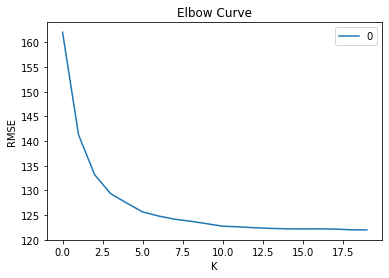

In [60]:
elbow_curve = pd.DataFrame(rmse_val)
elbow_curve.plot()
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('Elbow Curve')

# Hyperparameter tuning with GridSearchCV

In [61]:
grid_params = {'n_neighbors' : [2,3,4,5,6,7,8,9]}
knn = KNeighborsRegressor()
model_best = GridSearchCV(knn, grid_params, cv=5)
model_best.fit(X_train, y_train)
y_pred_knn_best = model_best.predict(X_test)
print(model_best.best_estimator_)

KNeighborsRegressor(n_neighbors=9)


In [62]:
cv_knn_best = cross_val_score(model_best, X_train, y_train, cv=5)
print(cv_knn_best)

[0.23966949 0.23106555 0.24534362 0.26298744 0.24357992]


In [63]:
np.mean(cv_knn_best), np.std(cv_knn_best)

(0.2445292055804164, 0.010460952259506785)

In [64]:
r2_score(y_test, y_pred_knn_best)

0.24143717120522545

In [65]:
mean_absolute_error(y_test, y_pred_knn_best)

75.19802815074269

# Negative MAE Comparison  

In [66]:
lr_neg_mae = cross_val_score(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [67]:
lr_mae_mean = np.mean(-1 * lr_neg_mae)
lr_mae_std = np.std(-1 * lr_neg_mae)
lr_mae_mean, lr_mae_std

(76.43752416139792, 1.4025418878368279)

In [68]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

77.61039022490115

In [69]:
rf_neg_mae = cross_val_score(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [70]:
rf_mae_mean = np.mean(-1 * rf_neg_mae)
rf_mae_std = np.std(-1 * rf_neg_mae)
rf_mae_mean, rf_mae_std

(74.37821569438627, 1.176834812403658)

In [71]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

75.44486080937034

In [72]:
knn_neg_mae = cross_val_score(model_best.best_estimator_, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)

In [73]:
knn_neg_mae_mean = np.mean(-1 * knn_neg_mae)
knn_neg_mae_std = np.std(-1 * knn_neg_mae)
knn_neg_mae_mean, knn_neg_mae_std

(74.26767757180585, 1.5874809911033392)

In [74]:
mean_absolute_error(y_test,model_best.best_estimator_.predict(X_test))

75.19802815074269

In [75]:
y.mean()

157.8596038721182

# Conclusion

After cross-validating and hyperparameter tuning with grid search CV on all three models, it appears that the best performing model in terms of mean absolute error is the KNN Regression Model, as  it had the lowest MAE out of all models (75.2),  but the highest variability (1.59) after hyperparameter tuning. The Random Forest Regression model is the second best performing model, because it had a slightly higher MAE (75.44) (but still lower than the Linear Regression Model), although it had the lowest variability (1.18). The Linear Regression model was the worst performing with the highest MAE (77.61), and second lowest variability out of all 3 models (1.40). 

The results suggest that the KNN model was more accurate than the RF model by about 0.25 dollars, and more accurate than the Linear Regression model by 2.4 dollars. The KNN is the best performing in terms of price predictions.
All three models peform better than predicting price by simply taking its mean, which is $157.86. Additionally, the differences in accuracy across models were not very large.

The Random Forest Regression model and KNN model were very close in terms of MAE, but the RF model showed that it could predict prices with less variability in its predictions by a significant amount, since the MAE standard deviation for the RF model was lower by 0.41. It is hard to conclude, without doing further tunings on the models, which is best, but considering the bias-variability trade-off, I would suggest going with the RF Model over the KNN Model; I believe it will be more accurate in its predicitions, especially if we want to use the models on a much larger dataset of airbnb listings. The RF model would scale better than the KNN model with more data.

It is also important to note that the most useful feature revealed by the Linear Regression Model to predict price was the type of room (hotel room), and that it was in Rhode Island in terms of city location, and then the availability of any given listing (regardless of room type or city location) throughout the year.

In [76]:
import joblib

In [77]:
model = rf_best
filename = 'RF Model.sav'
joblib.dump(model, filename)

['RF Model.sav']